# SETUP
---

## import packages

In [1]:
# ----------------------------------------------------------------#

import numpy as np
import pandas as pd
import seaborn as sns

# ----------------------------------------------------------------#

from matplotlib import pyplot as plt
from scipy import stats as st
from sqlalchemy import create_engine

# sklearn - random forests
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR

# sklearn - linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

# skelearn - nearest neighbor
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neighbors import KNeighborsRegressor as KNR

# sklearn - model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split

# sklearn - model preparation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize, scale

# sklearn - support vector machine
from sklearn.svm import SVC, SVR

# sklearn - decision trees
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR

# ----------------------------------------------------------------#

# statsmodels
from statsmodels import api as sm
from statsmodels.tools.eval_measures import mse, rmse

# ----------------------------------------------------------------#

import warnings
warnings.filterwarnings('ignore')

## set plot style

In [2]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to set plot style if no arguments provided
jtplot.style()

## define constants

In [3]:
RUN_NORM = True
LOOKUP_ALLSTAR = True

## read csv & create data frame

In [4]:
df = pd.read_csv('Seasons_Stats.csv')
#df = pd.read_csv('Seasons_Stats_2018_2019.csv')
df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


# DATA CLEANING
---

## initial inspection

In [5]:
df.describe()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,12345.000000,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7127.822084,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12345.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18517.500000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

### remove `Unnamed: 0` as it is an index

In [7]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## remove * from player names (`Player` variable)

In [8]:
df['Player'] = df['Player'].str.replace('*','')
df[df.Year==1951]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
313,1951.0,Paul Arizin,SF,22.0,PHW,65.0,NaN,NaN,NaN,0.512,...,0.793,NaN,NaN,640.0,138.0,NaN,NaN,NaN,284.0,1121.0
314,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0
315,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0
316,1951.0,Leo Barnhorst,SF,26.0,INO,68.0,NaN,NaN,NaN,0.377,...,0.689,NaN,NaN,296.0,218.0,NaN,NaN,NaN,197.0,546.0
317,1951.0,Ed Bartels,F,25.0,WSC,17.0,NaN,NaN,NaN,0.307,...,0.522,NaN,NaN,84.0,12.0,NaN,NaN,NaN,54.0,72.0
318,1951.0,Ed Beach,F,22.0,TOT,12.0,NaN,NaN,NaN,0.262,...,0.667,NaN,NaN,25.0,3.0,NaN,NaN,NaN,14.0,22.0
319,1951.0,Ed Beach,F,22.0,MNL,11.0,NaN,NaN,NaN,0.282,...,0.667,NaN,NaN,25.0,2.0,NaN,NaN,NaN,14.0,22.0
320,1951.0,Ed Beach,F,22.0,TRI,1.0,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,0.0,0.0
321,1951.0,Ralph Beard,G,23.0,INO,66.0,NaN,NaN,NaN,0.435,...,0.775,NaN,NaN,251.0,318.0,NaN,NaN,NaN,96.0,1111.0
322,1951.0,Leon Blevins,G,24.0,INO,2.0,NaN,NaN,NaN,0.225,...,0.000,NaN,NaN,2.0,1.0,NaN,NaN,NaN,3.0,2.0


## drop irrelevant Year values

In [9]:
# First All Star Game was in 1951
# No All Star Game was played in 1999 due to lockout
drop_indexes = df[(df.Year == 1950) | (df.Year == 1999)].index
df = df.drop(index=drop_indexes).reset_index()
df = df.drop(['index'], axis=1)
df.Year.unique()

array([  nan, 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017.])

## deal with missing values

In [10]:
df_missing = pd.concat([df.isnull().sum().sort_values(ascending=False), (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100], axis=1)
df_missing.columns = ['Count','Percent']
df_missing[df_missing.Count > 0]

,Count,Percent
blank2,23872,100.000000
blanl,23872,100.000000
3P%,8840,37.030831
GS,6146,25.745643
3PAr,5536,23.190349
3P,5452,22.838472
3PA,5452,22.838472
TOV%,4794,20.082105
USG%,4739,19.851709
TOV,4734,19.830764


- `blank2`, `blanl` appear to be separator columns and should be removed
- `Year` has missing values, which is odd. This should be inspected further.
- There are numerous other columns with missing values, the majority of which is explained by various statistics not being collected until more recent times. These will be kept in the dataset for now.

### drop blank columns

In [11]:
df = df.drop(['blank2','blanl'], axis=1)

### deal with missing values for Year column

In [12]:
print(df.Year.unique())
print('')
df[df.Year.isnull()].head()

[  nan 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961.
 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010.
 2011. 2012. 2013. 2014. 2015. 2016. 2017.]



,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### drop rows where Year value is null

In [13]:
drop_indexes = df[df.Year.isnull()].index
df = df.drop(index=drop_indexes).reset_index()
df = df.drop(['index'], axis=1)
df_missing = pd.concat([df.isnull().sum().sort_values(ascending=False), (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100], axis=1)
df_missing.columns = ['Count','Percent']
df_missing[df_missing.Count > 0]

,Count,Percent
3P%,8773,36.853602
GS,6079,25.536652
3PAr,5469,22.974165
3P,5385,22.621298
3PA,5385,22.621298
TOV%,4727,19.857173
USG%,4672,19.626129
TOV,4667,19.605125
BLK%,3520,14.786809
ORB%,3520,14.786809


In [14]:
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1951.0,Paul Arizin,SF,22.0,PHW,65.0,NaN,NaN,NaN,0.512,...,0.793,NaN,NaN,640.0,138.0,NaN,NaN,NaN,284.0,1121.0
1,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0
2,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0
3,1951.0,Leo Barnhorst,SF,26.0,INO,68.0,NaN,NaN,NaN,0.377,...,0.689,NaN,NaN,296.0,218.0,NaN,NaN,NaN,197.0,546.0
4,1951.0,Ed Bartels,F,25.0,WSC,17.0,NaN,NaN,NaN,0.307,...,0.522,NaN,NaN,84.0,12.0,NaN,NaN,NaN,54.0,72.0


## variable sorting

In [15]:
# create list of continuous variables
cont_vars = df.select_dtypes(exclude='object').columns.to_list()
print('continuous variables', cont_vars)

print('')

# create list of categorical variables
cat_vars = df.select_dtypes(include='object').columns.to_list()
print('categorical variables', cat_vars)

continuous variables ['Year', 'Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

categorical variables ['Player', 'Pos', 'Tm']


### convert numeric categorical variables

In [16]:
# convert Year values to String
df.Year = df.Year.astype(int)
df.Year = df.Year.astype(str)

# move Year variable from continuous list to categorical list
cont_vars.remove('Year')
cat_vars = df.select_dtypes(include='object').columns.to_list()

# sanity check
print(cont_vars)
print('')
print(cat_vars)

['Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

['Year', 'Player', 'Pos', 'Tm']


In [17]:
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1951,Paul Arizin,SF,22.0,PHW,65.0,NaN,NaN,NaN,0.512,...,0.793,NaN,NaN,640.0,138.0,NaN,NaN,NaN,284.0,1121.0
1,1951,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0
2,1951,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0
3,1951,Leo Barnhorst,SF,26.0,INO,68.0,NaN,NaN,NaN,0.377,...,0.689,NaN,NaN,296.0,218.0,NaN,NaN,NaN,197.0,546.0
4,1951,Ed Bartels,F,25.0,WSC,17.0,NaN,NaN,NaN,0.307,...,0.522,NaN,NaN,84.0,12.0,NaN,NaN,NaN,54.0,72.0


## inspect data ranges

In [18]:
df.describe()

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,23797.000000,23805.000000,17726.000000,23631.000000,23594.000000,23722.000000,18336.000000,23710.000000,20285.000000,20285.000000,...,22986.000000,20290.000000,20290.000000,23805.000000,23805.000000,20290.000000,20290.000000,19138.000000,23805.000000,23805.000000
mean,26.653990,51.355177,23.837809,1219.975668,12.488849,0.494737,0.158677,0.323861,6.172053,13.721385,...,0.720064,62.791129,148.685658,226.741987,116.392229,40.259980,24.709956,74.724893,117.394077,517.417979
std,3.838416,26.544239,28.833636,944.622706,5.948877,0.093244,0.187588,0.216861,4.845447,6.620851,...,0.141431,67.728724,146.796405,229.423479,137.156372,38.920955,37.173097,68.110359,85.134701,497.008453
min,18.000000,1.000000,0.000000,0.000000,-60.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,28.000000,0.000000,345.000000,9.800000,0.460000,0.005000,0.207000,2.600000,8.800000,...,0.659000,12.000000,34.000000,52.000000,19.000000,9.000000,3.000000,18.000000,40.000000,109.000000
50%,26.000000,59.000000,8.000000,1065.000000,12.700000,0.507000,0.064000,0.295000,5.400000,12.700000,...,0.744000,38.000000,108.000000,162.000000,69.000000,29.000000,11.000000,56.000000,110.000000,373.000000
75%,29.000000,76.000000,46.000000,1989.000000,15.600000,0.544000,0.288000,0.400000,8.900000,18.100000,...,0.809000,92.000000,215.000000,324.000000,163.000000,60.000000,30.000000,114.000000,184.000000,792.000000
max,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,100.000000,100.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


### create normalization exclude list

In [19]:
df_mins = df.select_dtypes(exclude=['object']).min().to_frame().reset_index()
df_mins.columns = ['variable','var_min']
exclude_norm = df_mins[df_mins.var_min < 0].variable.to_list()
exclude_norm

['PER', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

## pull in AllStar data

In [20]:
#df_allstar = pd.read_csv('capstone2_allstar_data.csv')
df_allstar = pd.read_csv('capstone2_allstar_data_2_add_2018_2019.csv')
df_allstar.Year = df_allstar.Year.astype(str)
df_allstar.head()

,Year,Team,Starter,Player,Tm,MP,FG,FGA,3P,3PA,...,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,FT%
0,1951,EAST,NaN,Ed Macauley,BOS,NaN,7,12,NaN,NaN,...,6,1,NaN,NaN,NaN,3,20,0.583,NaN,0.857
1,1951,EAST,NaN,Joe Fulks,PHW,NaN,6,15,NaN,NaN,...,7,3,NaN,NaN,NaN,5,19,0.400,NaN,0.778
2,1951,EAST,NaN,Paul Arizin,PHW,NaN,7,12,NaN,NaN,...,7,0,NaN,NaN,NaN,2,15,0.583,NaN,0.500
3,1951,EAST,NaN,Dolph Schayes,SYR,NaN,7,10,NaN,NaN,...,14,3,NaN,NaN,NaN,1,15,0.700,NaN,0.500
4,1951,EAST,NaN,Vince Boryla,NYK,NaN,4,6,NaN,NaN,...,2,2,NaN,NaN,NaN,3,9,0.667,NaN,1.000


## merge AllStar data with features dataframe

In [21]:
def lookup_allstar(x):
    #print(type(x['Player']), type(x['Year']))
    #print(x['Player'], x['Year'])
    #print(df_allstar[df_allstar['Year'] == str(x['Year'])]['Player'].to_list())
    y = x['Player'] in df_allstar[df_allstar['Year'] == str(x['Year'])]['Player'].to_list()
    #print(y)
    #print('...')
    return y

if LOOKUP_ALLSTAR:
    df['AllStar'] = df[['Year','Player']].apply(lookup_allstar, axis=1)
    
    # save to csv to save compute time in future runs
    df.to_csv('Seasons_Stats_merge_w_AllStar.csv', index=False)
else:
    df = pd.read_csv('Seasons_Stats_merge_w_AllStar.csv')

df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,AllStar
0,1951,Paul Arizin,SF,22.0,PHW,65.0,NaN,NaN,NaN,0.512,...,NaN,NaN,640.0,138.0,NaN,NaN,NaN,284.0,1121.0,True
1,1951,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0,False
2,1951,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0,False
3,1951,Leo Barnhorst,SF,26.0,INO,68.0,NaN,NaN,NaN,0.377,...,NaN,NaN,296.0,218.0,NaN,NaN,NaN,197.0,546.0,False
4,1951,Ed Bartels,F,25.0,WSC,17.0,NaN,NaN,NaN,0.307,...,NaN,NaN,84.0,12.0,NaN,NaN,NaN,54.0,72.0,False


# DATA EXPLORATION
---

In [22]:
print('Number of years:', df.Year.nunique())
print('Number of players:',df.Player.nunique())
print('Average number of players per year', df.groupby('Year').Player.nunique().mean())
print('Max number of players in 1 year', df.groupby('Year').Player.nunique().max())
print('Min number of players in 1 year', df.groupby('Year').Player.nunique().min())
print('Average number of All-Stars per year', df[df.AllStar].groupby('Year').Player.nunique().mean())
print('Max number of All-Stars per year', df[df.AllStar].groupby('Year').Player.nunique().max())
print('Min number of All-Stars per year', df[df.AllStar].groupby('Year').Player.nunique().min())

print('Number of columns:',len(df.columns))

Number of years: 66
Number of players: 3802
Average number of players per year 297.3181818181818
Max number of players in 1 year 492
Min number of players in 1 year 92
Average number of All-Stars per year 22.59090909090909
Max number of All-Stars per year 27
Min number of All-Stars per year 19
Number of columns: 51


## plot number of players per year

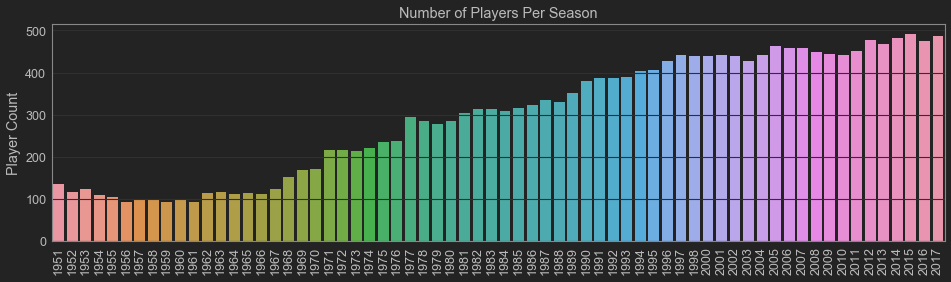

In [23]:
plt.rcParams['figure.figsize'] = (16,4)
sns.barplot(df.Year.unique(), df.groupby('Year').Player.nunique())
plt.xticks(rotation=90)
plt.ylabel('Player Count')
plt.title('Number of Players Per Season')
plt.show()

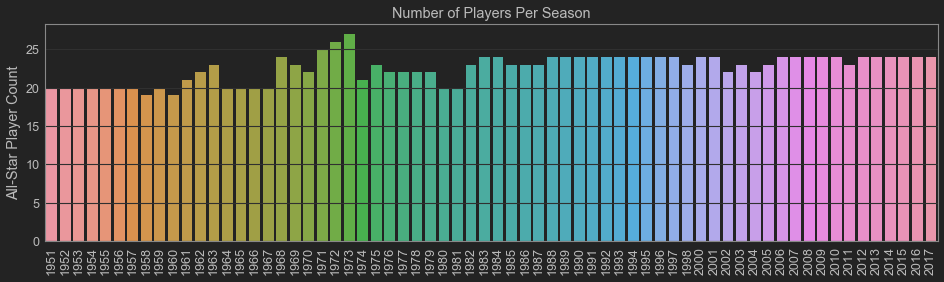

In [24]:
plt.rcParams['figure.figsize'] = (16,4)
sns.barplot(df.Year.unique(), df[df.AllStar].groupby('Year').Player.nunique())
plt.xticks(rotation=90)
plt.ylabel('All-Star Player Count')
plt.title('Number of Players Per Season')
plt.show()

## plot observations per variable

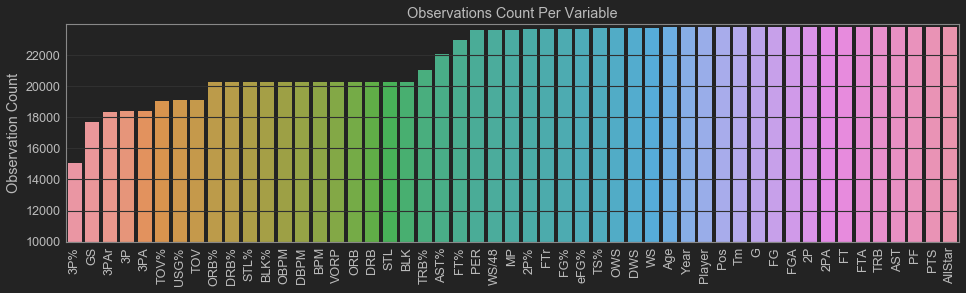

In [25]:
from collections import OrderedDict

plt.rcParams['figure.figsize'] = (16,4)

tmp_dict = {}
for var in df.columns:
    tmp_dict[var] = df[var].count()

# sort dictionary
tmp_dict = OrderedDict(sorted(tmp_dict.items(), key=lambda x: x[1]))
    
sns.barplot(list(tmp_dict.keys()), list(tmp_dict.values()))
plt.xticks(rotation=90)
plt.ylim(10000,24000)
plt.yticks(np.arange(10000,24000,2000))
plt.ylabel('Observation Count')
plt.title('Observations Count Per Variable')
plt.show()

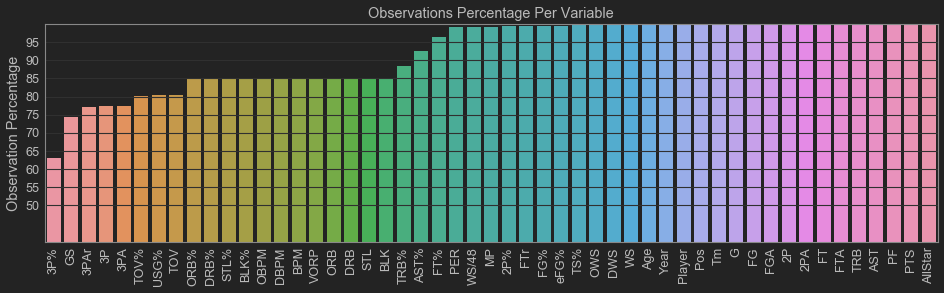

In [26]:
from collections import OrderedDict

plt.rcParams['figure.figsize'] = (16,4)

tmp_dict = {}
i = 0
for var in df.columns:
    tmp_dict[var] = df[var].count()/df.count().max()*100

# sort dictionary
tmp_dict = OrderedDict(sorted(tmp_dict.items(), key=lambda x: x[1]))
    
sns.barplot(list(tmp_dict.keys()), list(tmp_dict.values()))
plt.xticks(rotation=90)
plt.ylim(40,100)
plt.yticks(np.arange(50,100,5))
plt.ylabel('Observation Percentage')
plt.title('Observations Percentage Per Variable')
plt.show()

## plot AllStar player percentage per year

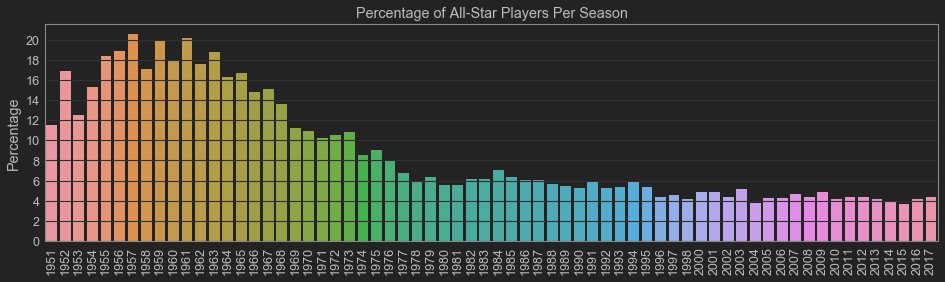

In [27]:
plt.rcParams['figure.figsize'] = (16,4)
sns.barplot(df.Year.unique(), df.groupby('Year').AllStar.sum()/df.groupby('Year').Player.count()*100)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,22,2))
plt.ylabel('Percentage')
plt.title('Percentage of All-Star Players Per Season')
plt.show()

## plot basic performance metrics, split by All-Star status

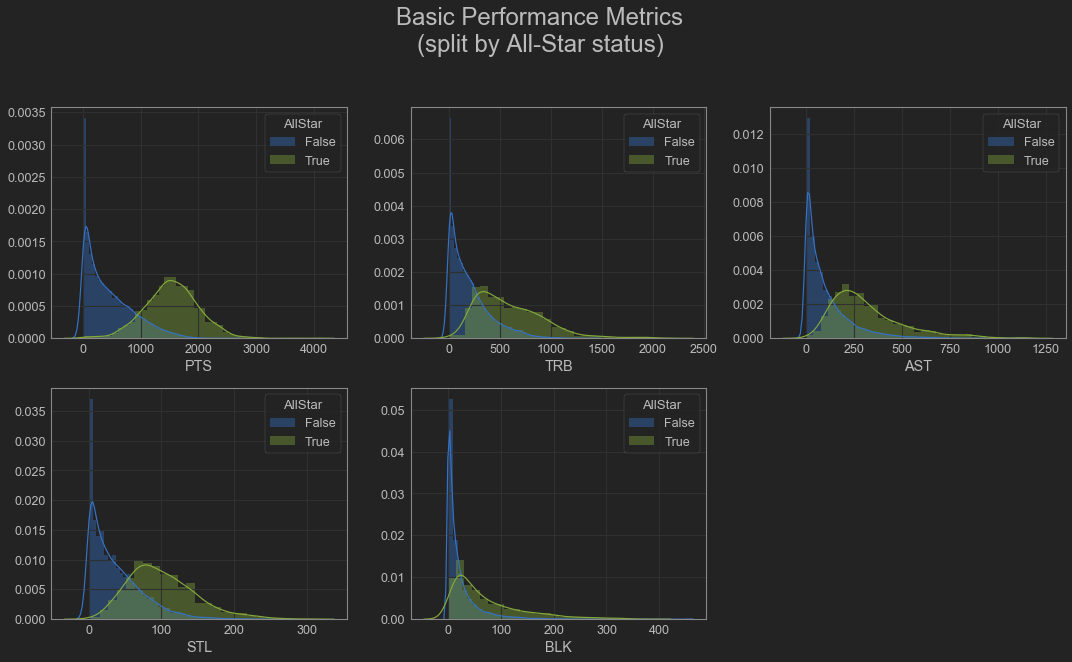

In [28]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(2,3,1)
sns.distplot(df[~df.AllStar].PTS, label='False')
sns.distplot(df[df.AllStar].PTS, label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,2)
sns.distplot(df[~df.AllStar].TRB.dropna(), label='False')
sns.distplot(df[df.AllStar].TRB.dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,3)
sns.distplot(df[~df.AllStar].AST.dropna(), label='False')
sns.distplot(df[df.AllStar].AST.dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,4)
sns.distplot(df[~df.AllStar].STL.dropna(), label='False')
sns.distplot(df[df.AllStar].STL.dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,5)
sns.distplot(df[~df.AllStar].BLK.dropna(), label='False')
sns.distplot(df[df.AllStar].BLK.dropna(), label='True')
plt.legend(title='AllStar')

plt.suptitle('Basic Performance Metrics\n(split by All-Star status)', y=1.15, fontsize=24)
plt.tight_layout()
plt.show()

## plot shooting percentages, split by All-Star status

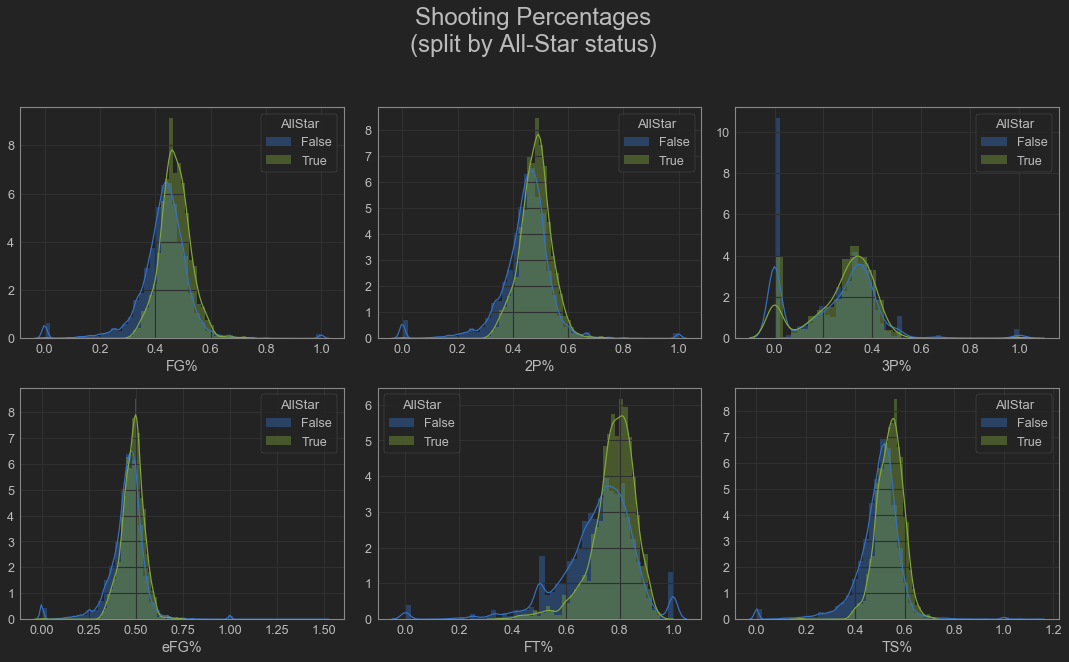

In [29]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(2,3,1)
sns.distplot(df[~df.AllStar]['FG%'].dropna(), label='False')
sns.distplot(df[df.AllStar]['FG%'].dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,2)
sns.distplot(df[~df.AllStar]['2P%'].dropna(), label='False')
sns.distplot(df[df.AllStar]['2P%'].dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,3)
sns.distplot(df[~df.AllStar]['3P%'].dropna(), label='False')
sns.distplot(df[df.AllStar]['3P%'].dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,4)
sns.distplot(df[~df.AllStar]['eFG%'].dropna(), label='False')
sns.distplot(df[df.AllStar]['eFG%'].dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,5)
sns.distplot(df[~df.AllStar]['FT%'].dropna(), label='False')
sns.distplot(df[df.AllStar]['FT%'].dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,6)
sns.distplot(df[~df.AllStar]['TS%'].dropna(), label='False')
sns.distplot(df[df.AllStar]['TS%'].dropna(), label='True')
plt.legend(title='AllStar')

plt.suptitle('Shooting Percentages\n(split by All-Star status)', y=1.15, fontsize=24)
plt.tight_layout()
plt.show()

### win shares

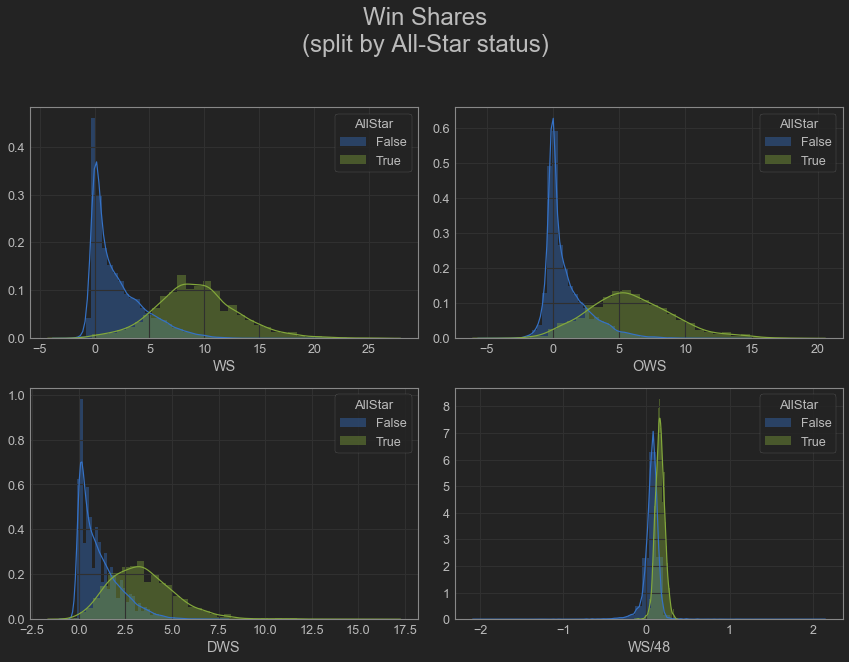

In [30]:
plt.rcParams['figure.figsize'] = (12,8)

plt.subplot(2,2,1)
sns.distplot(df[~df.AllStar].WS.dropna(), label='False')
sns.distplot(df[df.AllStar].WS.dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,2,2)
sns.distplot(df[~df.AllStar].OWS.dropna(), label='False')
sns.distplot(df[df.AllStar].OWS.dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,2,3)
sns.distplot(df[~df.AllStar].DWS.dropna(), label='False')
sns.distplot(df[df.AllStar].DWS.dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,2,4)
sns.distplot(df[~df.AllStar]['WS/48'].dropna(), label='False')
sns.distplot(df[df.AllStar]['WS/48'].dropna(), label='True')
plt.legend(title='AllStar')

plt.suptitle('Win Shares\n(split by All-Star status)', y=1.15, fontsize=24)
plt.tight_layout()
plt.show()

## ratings

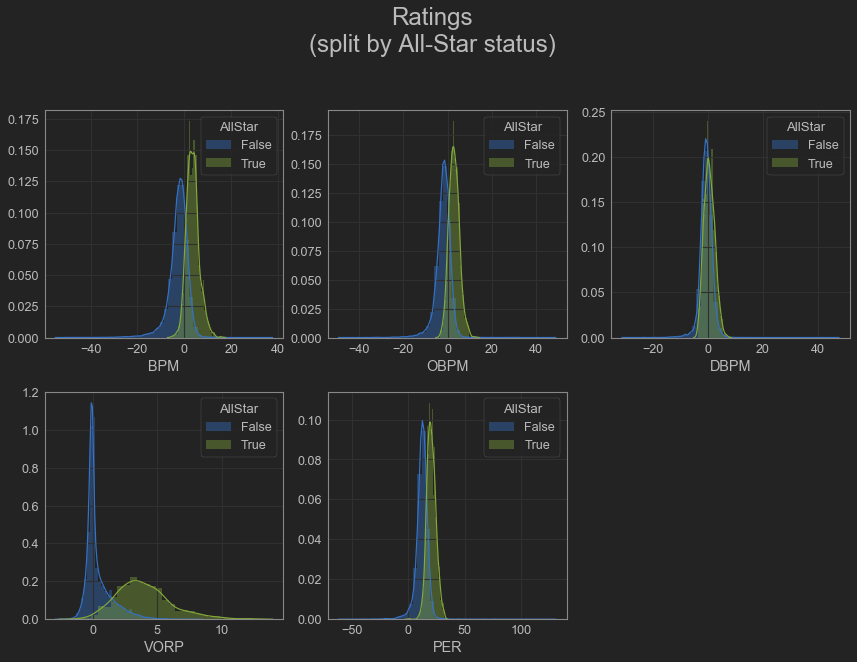

In [31]:
plt.rcParams['figure.figsize'] = (12,8)

plt.subplot(2,3,1)
sns.distplot(df[~df.AllStar].BPM.dropna(), label='False')
sns.distplot(df[df.AllStar].BPM.dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,2)
sns.distplot(df[~df.AllStar].OBPM.dropna(), label='False')
sns.distplot(df[df.AllStar].OBPM.dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,3)
sns.distplot(df[~df.AllStar].DBPM.dropna(), label='False')
sns.distplot(df[df.AllStar].DBPM.dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,4)
sns.distplot(df[~df.AllStar].VORP.dropna(), label='False')
sns.distplot(df[df.AllStar].VORP.dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,3,5)
sns.distplot(df[~df.AllStar].PER.dropna(), label='False')
sns.distplot(df[df.AllStar].PER.dropna(), label='True')
plt.legend(title='AllStar')

plt.suptitle('Ratings\n(split by All-Star status)', y=1.15, fontsize=24)
plt.tight_layout()
plt.show()

## ttests

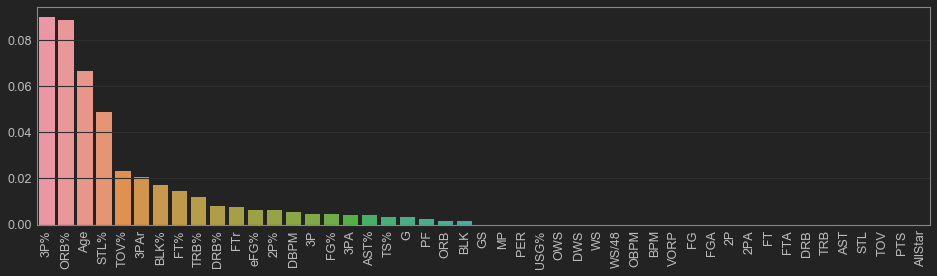

In [32]:
from collections import OrderedDict

plt.rcParams['figure.figsize'] = (16,4)

pval_dict = {}
for var in df.select_dtypes(exclude='object'):
    pval = st.ttest_ind(df[df.AllStar].dropna()[var],df[~df.AllStar].dropna()[var])[1]
    if pval > 0.05:
        print('ttest pvalue > 0.05', var, pval)
    pval_dict[var] = -1/np.log(pval)

# sort dictionary
pval_dict = OrderedDict(sorted(pval_dict.items(), key=lambda x: x[1], reverse=True))

sns.barplot(list(pval_dict.keys()), list(pval_dict.values()))
plt.xticks(rotation=90)
plt.show()

## normalize player statistics per year

In [33]:
# exclude variables with negative observations
cont_vars2 = cont_vars
for var in exclude_norm:
    cont_vars2.remove(var)

if RUN_NORM:
    # iterate through the continuous variables
    for var in cont_vars2:
        # temporary data frame holding the yearly max value for each statistic
        df_tmp = df.groupby('Year').aggregate('max')[var].reset_index()
        # normalize each statitistical value by dividing by the max value of that statistical category for that year
        df[var + '_norm'] = df[var] / df.Year.apply(lambda x: df_tmp.loc[df_tmp.Year == x][var].iloc[0])
    
    # save to csv to save compute time in future runs
    df.to_csv('Seasons_Stats_merge_w_AllStar_normalized.csv', index=False)

else:
    df = pd.read_csv('Seasons_Stats_merge_w_AllStar_normalized.csv')
    
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%_norm,ORB_norm,DRB_norm,TRB_norm,AST_norm,STL_norm,BLK_norm,TOV_norm,PF_norm,PTS_norm
0,1951,Paul Arizin,SF,22.0,PHW,65.0,NaN,NaN,NaN,0.512,...,0.793,NaN,NaN,0.592593,0.333333,NaN,NaN,NaN,0.922078,0.580228
1,1951,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,0.644,NaN,NaN,0.082407,0.185990,NaN,NaN,NaN,0.314935,0.104555
2,1951,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,0.649,NaN,NaN,0.092593,0.277778,NaN,NaN,NaN,0.318182,0.078675
3,1951,Leo Barnhorst,SF,26.0,INO,68.0,NaN,NaN,NaN,0.377,...,0.689,NaN,NaN,0.274074,0.526570,NaN,NaN,NaN,0.639610,0.282609
4,1951,Ed Bartels,F,25.0,WSC,17.0,NaN,NaN,NaN,0.307,...,0.522,NaN,NaN,0.077778,0.028986,NaN,NaN,NaN,0.175325,0.037267


## create list of normalized variables

In [34]:
cont_vars_norm = cont_vars2

for i in range(len(cont_vars_norm)):
    cont_vars_norm[i] = cont_vars_norm[i] + '_norm'
    
#cont_vars_norm.remove('index_norm')
cont_vars_norm

['Age_norm',
 'G_norm',
 'GS_norm',
 'MP_norm',
 'TS%_norm',
 '3PAr_norm',
 'FTr_norm',
 'ORB%_norm',
 'DRB%_norm',
 'TRB%_norm',
 'AST%_norm',
 'STL%_norm',
 'BLK%_norm',
 'TOV%_norm',
 'USG%_norm',
 'FG_norm',
 'FGA_norm',
 'FG%_norm',
 '3P_norm',
 '3PA_norm',
 '3P%_norm',
 '2P_norm',
 '2PA_norm',
 '2P%_norm',
 'eFG%_norm',
 'FT_norm',
 'FTA_norm',
 'FT%_norm',
 'ORB_norm',
 'DRB_norm',
 'TRB_norm',
 'AST_norm',
 'STL_norm',
 'BLK_norm',
 'TOV_norm',
 'PF_norm',
 'PTS_norm']

## add season score and normalized season score

In [35]:
# generate season score by averaging the normalized values of the statistical categories
df['SsnScr'] = df[cont_vars_norm].mean(axis=1)

# temporary data frame holding the yearly max value for season score
df_tmp = df.groupby('Year').aggregate('max').SsnScr.reset_index()

# normalize the season scores by dividing each season score by that year's maximum season score
df['SsnScr_norm'] = df.SsnScr / df.Year.apply(lambda x: df_tmp.loc[df_tmp.Year == x].SsnScr.iloc[0])

df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB_norm,TRB_norm,AST_norm,STL_norm,BLK_norm,TOV_norm,PF_norm,PTS_norm,SsnScr,SsnScr_norm
0,1951,Paul Arizin,SF,22.0,PHW,65.0,NaN,NaN,NaN,0.512,...,NaN,0.592593,0.333333,NaN,NaN,NaN,0.922078,0.580228,0.684184,0.778164
1,1951,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,NaN,0.082407,0.185990,NaN,NaN,NaN,0.314935,0.104555,0.358346,0.407569
2,1951,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,NaN,0.092593,0.277778,NaN,NaN,NaN,0.318182,0.078675,0.342044,0.389027
3,1951,Leo Barnhorst,SF,26.0,INO,68.0,NaN,NaN,NaN,0.377,...,NaN,0.274074,0.526570,NaN,NaN,NaN,0.639610,0.282609,0.493899,0.561742
4,1951,Ed Bartels,F,25.0,WSC,17.0,NaN,NaN,NaN,0.307,...,NaN,0.077778,0.028986,NaN,NaN,NaN,0.175325,0.037267,0.256518,0.291754
5,1951,Ed Beach,F,22.0,TOT,12.0,NaN,NaN,NaN,0.262,...,NaN,0.023148,0.007246,NaN,NaN,NaN,0.045455,0.011387,0.201918,0.229654
6,1951,Ed Beach,F,22.0,MNL,11.0,NaN,NaN,NaN,0.282,...,NaN,0.023148,0.004831,NaN,NaN,NaN,0.045455,0.011387,0.209789,0.238606
7,1951,Ed Beach,F,22.0,TRI,1.0,NaN,NaN,NaN,0.000,...,NaN,0.000000,0.002415,NaN,NaN,NaN,0.000000,0.000000,0.040409,0.045960
8,1951,Ralph Beard,G,23.0,INO,66.0,NaN,NaN,NaN,0.435,...,NaN,0.232407,0.768116,NaN,NaN,NaN,0.311688,0.575052,0.623471,0.709112
9,1951,Leon Blevins,G,24.0,INO,2.0,NaN,NaN,NaN,0.225,...,NaN,0.001852,0.002415,NaN,NaN,NaN,0.009740,0.001035,0.161561,0.183754


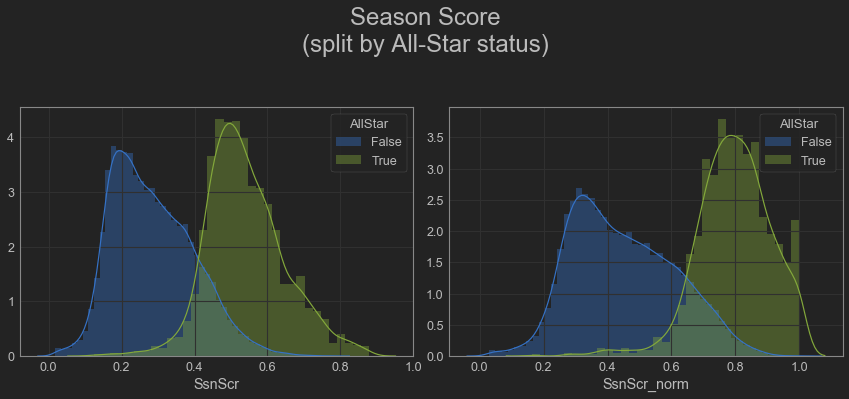

In [36]:
plt.rcParams['figure.figsize'] = (12,8)

plt.subplot(2,2,1)
sns.distplot(df[~df.AllStar].SsnScr.dropna(), label='False')
sns.distplot(df[df.AllStar].SsnScr.dropna(), label='True')
plt.legend(title='AllStar')

plt.subplot(2,2,2)
sns.distplot(df[~df.AllStar].SsnScr_norm.dropna(), label='False')
sns.distplot(df[df.AllStar].SsnScr_norm.dropna(), label='True')
plt.legend(title='AllStar')

plt.suptitle('Season Score\n(split by All-Star status)', y=1.15, fontsize=24)
plt.tight_layout()
plt.show()

## correlation with normalized season score

In [37]:
df[cont_vars].corrwith(df.SsnScr_norm).sort_values(ascending=False).to_frame()

,0
MP_norm,0.951862
PTS_norm,0.938342
FG_norm,0.931681
FGA_norm,0.926561
TOV_norm,0.916534
2PA_norm,0.915763
2P_norm,0.915757
FTA_norm,0.885214
FT_norm,0.874350
PF_norm,0.865447


# FEATURE ENGINEERING
---

## add position group feature

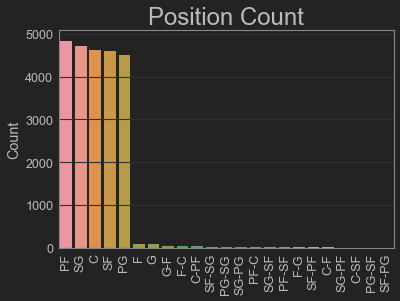

In [38]:
plt.rcParams['figure.figsize'] = (6,4)
sns.barplot(df.Pos.value_counts().index, df.Pos.value_counts())
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Position Count', fontsize=24)

plt.show()

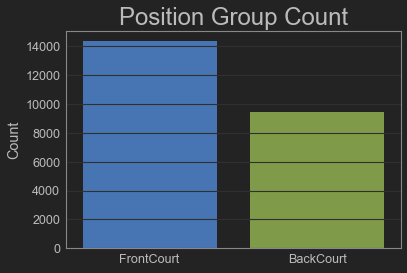

In [39]:
def group_positions(x):
    if x in ['G-F','SG','G','PG','SG-SF','SG-PG','PG-SG','PG-SF','SG-PF']:
        return 'BackCourt'
    else:
        return 'FrontCourt'

df['PosGrp'] = df.Pos.apply(group_positions)

plt.rcParams['figure.figsize'] = (6,4)
sns.barplot(df.PosGrp.value_counts().index, df.PosGrp.value_counts())
plt.ylabel('Count')
plt.title('Position Group Count', fontsize=24)

plt.show()

## add percentile

In [40]:
def percentile(x):
    year = x[0]
    posgrp = x[1]
    player = x[2]
    
    
    df_tmp = df[(df.Year == year) & (df.PosGrp == posgrp)].sort_values(by=['SsnScr_norm']).copy()
    df_tmp = df_tmp.reset_index()
    return 1 - (df_tmp[df_tmp.Player == player].index[0] / len(df_tmp))
    
    
df['Percentile'] = df[['Year','PosGrp','Player']].apply(percentile, axis=1)


## feature selection

In [41]:
features = ['AllStar','Year','Player'] + exclude_norm + ['SsnScr','SsnScr_norm','PosGrp','Percentile']

In [42]:
df_model = df[features]
df_model.head()

,AllStar,Year,Player,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,SsnScr,SsnScr_norm,PosGrp,Percentile
0,True,1951,Paul Arizin,NaN,9.2,4.5,13.7,NaN,NaN,NaN,NaN,NaN,0.684184,0.778164,FrontCourt,0.045045
1,False,1951,Curly Armstrong,NaN,-0.3,0.9,0.6,NaN,NaN,NaN,NaN,NaN,0.358346,0.407569,BackCourt,0.666667
2,False,1951,Cliff Barker,NaN,-0.9,0.7,-0.2,NaN,NaN,NaN,NaN,NaN,0.342044,0.389027,BackCourt,0.698413
3,False,1951,Leo Barnhorst,NaN,-0.7,1.9,1.3,NaN,NaN,NaN,NaN,NaN,0.493899,0.561742,FrontCourt,0.279279
4,False,1951,Ed Bartels,NaN,-0.8,0.2,-0.5,NaN,NaN,NaN,NaN,NaN,0.256518,0.291754,FrontCourt,0.882883


In [43]:
#df_model.to_csv('nba_all_star_team_prediction_model.csv', index=False)
    # first attempt
    # SsnScore based on key stats (arbitrarily chosen)
    # feature trimming by collinearity executed

#df_model.to_csv('nba_all_star_team_prediction_model_2.csv', index=False)
    # SsnScore based on all stats except PER
    # feature trimming by collinearity executed
    
#df_model.to_csv('nba_all_star_team_prediction_model_3.csv', index=False)
    # SsnScore based on all normalized stats except PER
    # feature trimming by collinearity executed
    # 1950 data dropped
    
#df_model.to_csv('nba_all_star_team_prediction_model_4.csv', index=False)
    # SsnScore based on all normalized stats except PER
    # feature trimming by collinearity executed
    # PosGrp added (grouping of Pos)

#df_model.to_csv('nba_all_star_team_prediction_model_5.csv', index=False)
    # SsnScore based on all stats except any stat with negative values
    # feature trimming by collinearity NOT executed
    # PosGrp added (grouping of Pos)
    
#df_model.to_csv('nba_all_star_team_prediction_model_6.csv', index=False)
    # SsnScore based on all normalized stats except any stat with negative values
    # features trimmed to SsnScore, SsnScore_norm and stats excluded from SsnScore calculations
    # 1950 data dropped
    # PosGrp added (grouping of Pos)
#df_model.to_csv('nba_all_star_team_prediction_model_7.csv', index=False)
#df_model.to_csv('nba_all_star_team_prediction_model_8.csv', index=False)
    # refactored code
#df_model.to_csv('nba_all_star_team_prediction_model_9.csv', index=False)
#df_model.to_csv('nba_all_star_team_prediction_model_10.csv', index=False)
    # this is the dataset used for creating slides
    # dont lose this one!
#df_model.to_csv('new_data_2018_2019.csv', index=False)
#df_model.to_csv('nba_all_star_team_prediction_model_11.csv', index=False)
    # adds an allstar count feature to train with a per year "limit"
    # does not appear to solve issue of predicting > 24 AllStars per year
df_model.to_csv('nba_all_star_team_prediction_model_12.csv', index=False)
    # add percentile by PosGrp